# Assignment - Supervised Learning flow

# Part 1(a) Student details:
* Please write the First-Name, First letter of Last-Name and last 4 digits of the i.d. for each student. 

In [58]:
# student details 1: Guy C. 7811
# student details 2: Yair B. 5885
# student details 3: Maksim K. 5561

## Part 1(b) - Chat-GPT/other AI-agent/other assistance used:
* If you changed the prompt until you got a satisfying answer, please add all versions
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add information:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>   
AI agent name: ChatGPT  
Goal: Assist in implementing a full supervised learning pipeline for a multiclass classification task in the cybersecurity domain, focusing on anomaly detection in network packet data.

ChatGPT was used to guide and help implement the following tasks:

Designing a Jupyter Notebook tailored for classifying network traffic using machine learning models.

Loading and analyzing the provided CSV datasets.

Cleaning and preprocessing data, including handling categorical features, missing values, and scaling.

Performing Exploratory Data Analysis (EDA) to visualize class distribution (no_anomaly, anomaly, suspicious) and relationships between features.

Implementing feature engineering techniques such as encoding protocols and TCP flags.

Training and selecting a machine learning model (RandomForestClassifier) suitable for the packet classification task.

Tuning model hyperparameters using GridSearchCV and 5-fold cross-validation with macro-averaged F1 score.

Applying consistent preprocessing to both training and test sets.

Evaluating performance with confusion matrices, F1-scores, and visualizations.

Predicting classes on the test set and displaying example results.

All steps include detailed code comments and printed outputs for transparency.

No other external help was used in the development of this project.  
</pre>

## Part 1(c) - Learning Problem and dataset explaination.
* Please explain in one paragraph
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add explaining text:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>
This project focuses on detecting anomalies in network traffic using a packet classification dataset. The dataset includes labeled network packet features with three classes: `no_anomaly`, `anomaly`, and `suspicious`. The goal is to build a supervised machine learning model that classifies whether a packet is normal, suspicious, or an anomaly, based on features such as protocol, packet length, and TCP flags. Suspicious labels will be treated as a separate class to allow multiclass classification. This problem falls under the domain of cybersecurity and has real-world applications in network intrusion detection systems (IDS). The classification model will be trained on `packets_train.csv` and evaluated on `packets_test.csv`.

</pre>

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [65]:
# Loading Data and Basic Plot

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
# Set visual theme
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Load the training dataset
train_df = pd.read_csv('packets_train.csv')

# Load test data
test_df = pd.read_csv('packets_test.csv')

# Display first few rows of Train set
print("Sample rows from the training dataset:")
display(train_df.head())

# Display first few rows of Test set
print("\nSample rows from the test dataset:")
display(test_df.head())

# Display dataset information
print("\nDataset Info:")
train_df.info()

# Check for missing values
print("\nMissing values per column:")
print(train_df.isnull().sum())

# Show basic statistics
print("\nStatistical summary of numeric features:")
display(train_df.describe())

Sample rows from the training dataset:


,timestamp,src_ip,dst_ip,protocol,ttl,packet_length,tcp_syn,tcp_ack,tcp_fin,label
0,1700000828,192.168.0.21,10.0.1.54,UDP,117,1046,0,0,0,no_anomaly
1,1700002005,192.168.1.37,10.0.6.187,TCP,41,405,0,0,0,no_anomaly
2,1700000143,192.168.2.248,10.0.5.239,TCP,91,799,0,1,0,no_anomaly
3,1700002333,192.168.2.174,10.0.2.83,UDP,116,851,0,0,0,no_anomaly
4,1700000913,192.168.1.223,10.0.4.54,TCP,32,902,1,0,0,no_anomaly



Sample rows from the test dataset:


,timestamp,src_ip,dst_ip,protocol,ttl,packet_length,tcp_syn,tcp_ack,tcp_fin,label
0,1700002175,192.168.2.238,10.0.2.45,TCP,59,1230,1,0,0,no_anomaly
1,1700001578,192.168.3.189,10.0.7.120,ICMP,70,1169,0,0,0,no_anomaly
2,1700001252,192.168.0.223,10.0.2.69,TCP,105,827,0,1,0,no_anomaly
3,1700000848,192.168.1.135,10.0.1.93,TCP,80,742,0,0,0,no_anomaly
4,1700001491,192.168.2.67,10.0.3.170,TCP,113,1273,0,0,0,no_anomaly



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9600 entries, 0 to 9599
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   timestamp      9600 non-null   int64 
 1   src_ip         9600 non-null   object
 2   dst_ip         9600 non-null   object
 3   protocol       9600 non-null   object
 4   ttl            9600 non-null   int64 
 5   packet_length  9600 non-null   int64 
 6   tcp_syn        9600 non-null   int64 
 7   tcp_ack        9600 non-null   int64 
 8   tcp_fin        9600 non-null   int64 
 9   label          9600 non-null   object
dtypes: int64(6), object(4)
memory usage: 750.1+ KB

Missing values per column:
timestamp        0
src_ip           0
dst_ip           0
protocol         0
ttl              0
packet_length    0
tcp_syn          0
tcp_ack          0
tcp_fin          0
label            0
dtype: int64

Statistical summary of numeric features:


,timestamp,ttl,packet_length,tcp_syn,tcp_ack,tcp_fin
count,9.600000e+03,9600.000000,9600.000000,9600.000000,9600.000000,9600.000000
mean,1.700001e+09,80.183229,764.495312,0.102813,0.251042,0.037187
std,6.817553e+02,28.215991,425.783943,0.303730,0.433635,0.189231
min,1.700000e+09,32.000000,40.000000,0.000000,0.000000,0.000000
25%,1.700001e+09,55.000000,389.000000,0.000000,0.000000,0.000000
50%,1.700001e+09,80.000000,764.000000,0.000000,0.000000,0.000000
75%,1.700002e+09,105.000000,1134.000000,0.000000,1.000000,0.000000
max,1.700002e+09,128.000000,1499.000000,1.000000,1.000000,1.000000


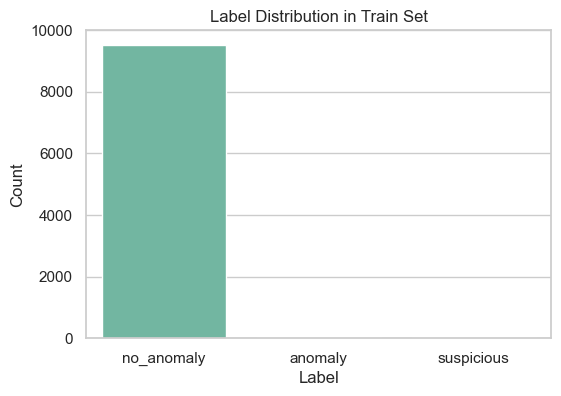

Label Distribution (%):
label
no_anomaly    99.229167
suspicious     0.468750
anomaly        0.302083
Name: proportion, dtype: float64


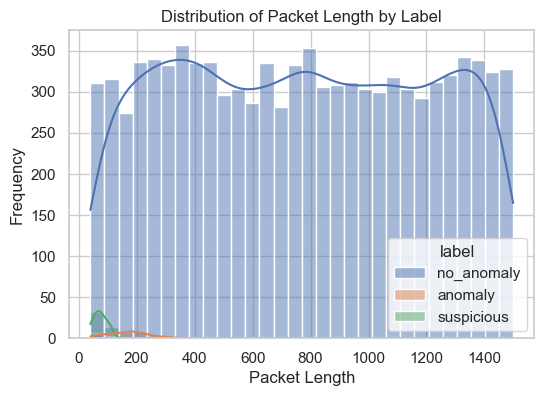

In [69]:
# Plot: Label distribution, check class balance (label distribution in %)
plt.figure(figsize=(6, 4))
sns.countplot(data=train_df, x='label', hue='label', palette='Set2', legend=False)
plt.title('Label Distribution in Train Set')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()
label_counts = train_df['label'].value_counts(normalize=True)
print("Label Distribution (%):")
print(label_counts * 100)

# We're using Matplotlib and Seaborn to visualize the distribution of labels in a dataset (train_df). 
# This kind of plot helps us understand how balanced or imbalanced our classification labels are.
# The Code calculates the percentage of each class label in the training dataset using value_counts(normalize=True), 
# then multiplies by 100 and prints the results to assess class balance.

# Plot: Histogram of packet_length by label
plt.figure(figsize=(6, 4))
sns.histplot(data=train_df, x='packet_length', hue='label', bins=30, kde=True)
plt.title('Distribution of Packet Length by Label')
plt.xlabel('Packet Length')
plt.ylabel('Frequency')
plt.show()

# It plots a histogram to visualize how the packet_length is distributed across different labels in our dataset.
# To compare how the packet length is distributed for each class label, which helps:
# 1. Spot patterns or separability between classes.
# 2. Detect skewness, outliers, or class-specific traits.


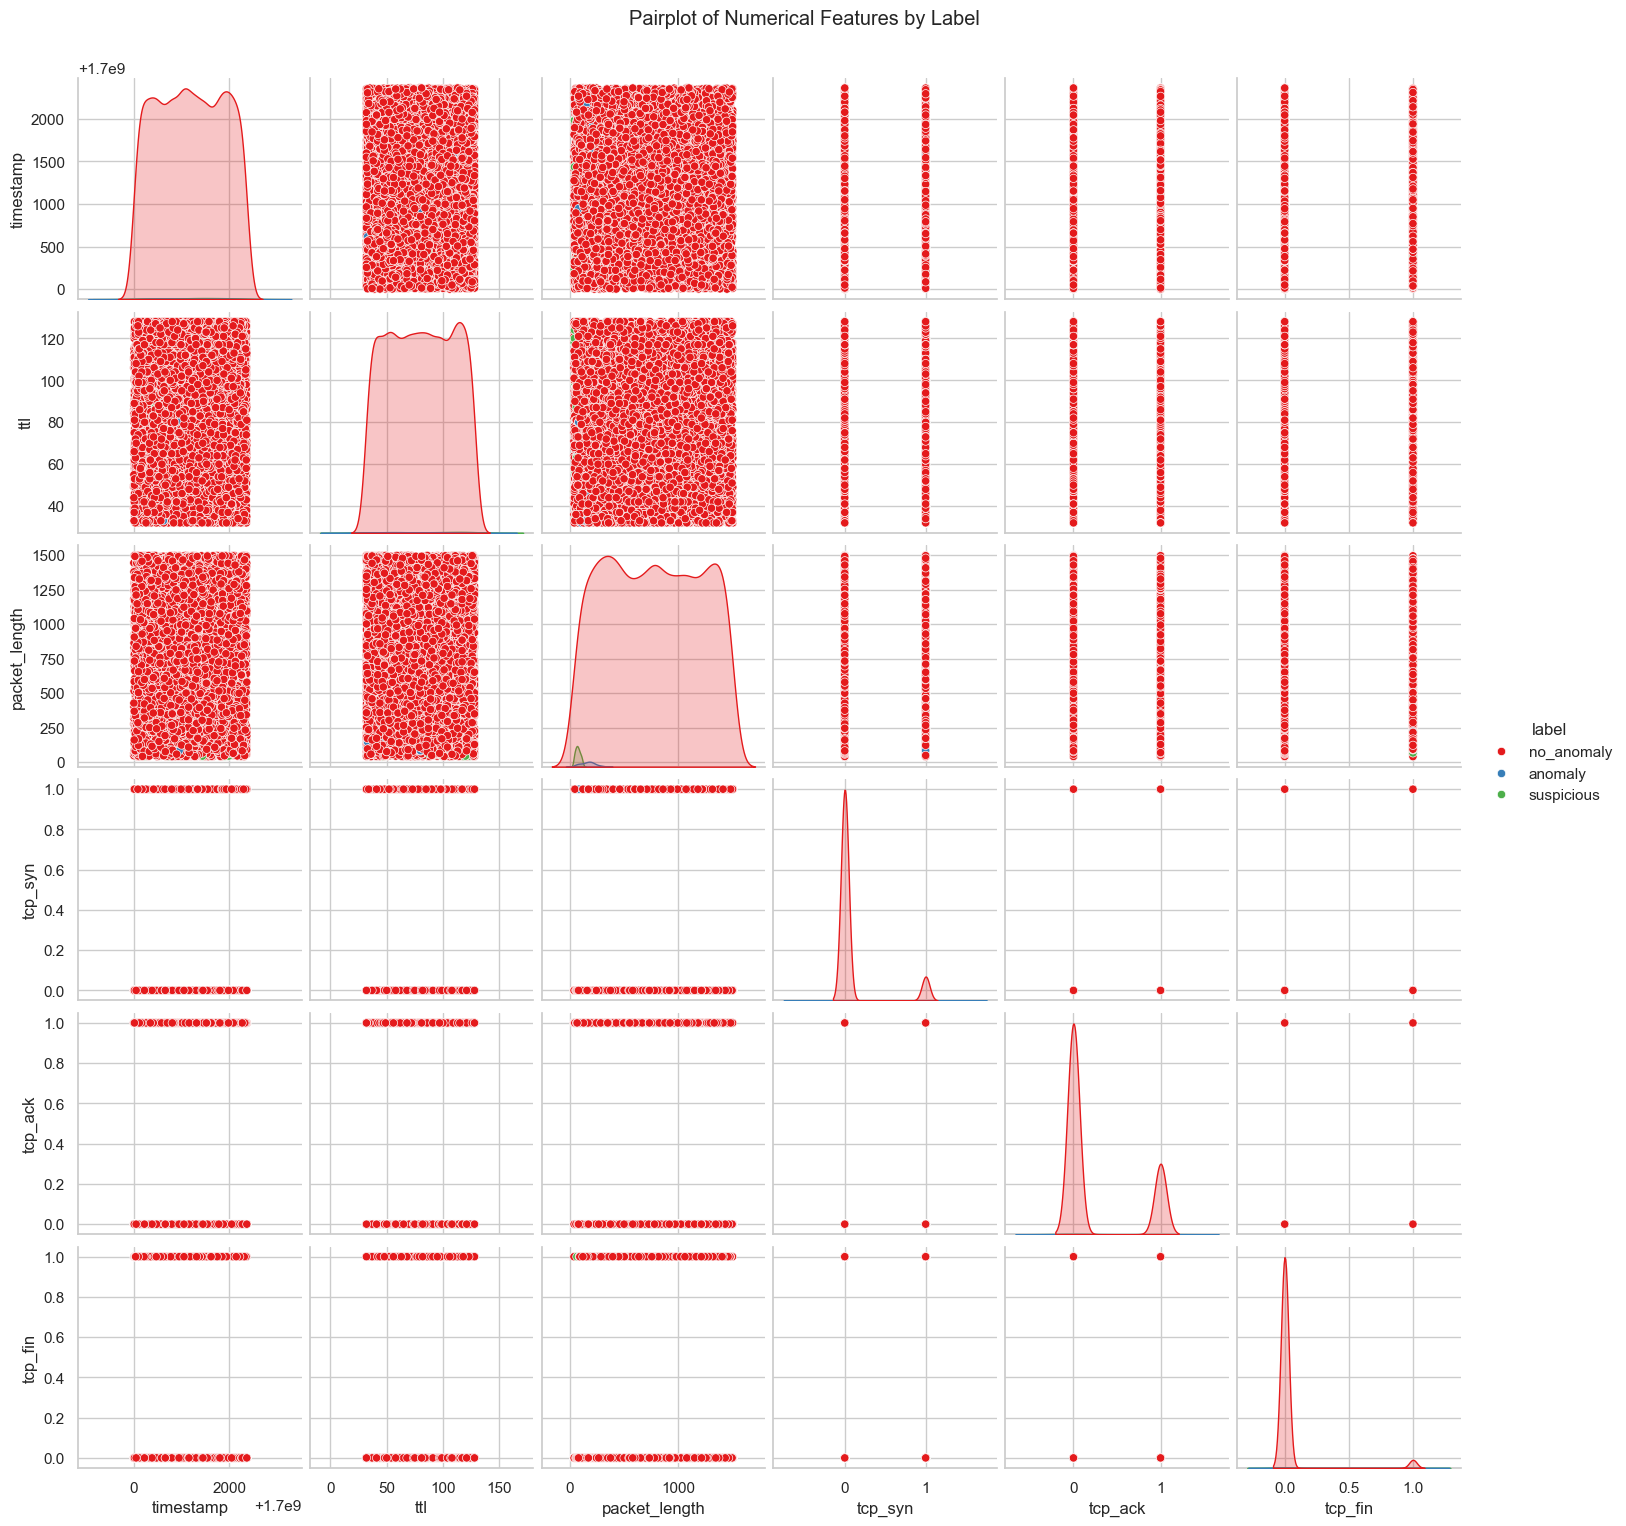

In [72]:
# Pairplot of numerical features by label
numeric_features = ['timestamp', 'ttl', 'packet_length', 'tcp_syn', 'tcp_ack', 'tcp_fin']
sns.pairplot(train_df[numeric_features + ['label']], hue='label', diag_kind='kde', palette='Set1')
plt.suptitle('Pairplot of Numerical Features by Label', y=1.02)
plt.show()

# This code creates a pairplot to visually explore relationships between numerical features across different labels.
# Purpose:
# 1. Helps detect clusters, patterns, or separability between classes.
# 2. Reveals linear or nonlinear relationships between features.
# 3. Identifies potential outliers or feature redundancy.

## Part 3 - Experiments
You could add as many code cells as needed

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np

In [78]:
# This code preprocesses numerical features, encodes labels, splits data into train/validation/test sets, 
# trains a balanced Random Forest classifier, and evaluates its performance to build a robust multiclass classification model.
# A classification report showing how well the model performs on validation data.

# Features to use (not using IP addresses for now)
features = ['ttl', 'packet_length', 'tcp_syn', 'tcp_ack', 'tcp_fin']

X = train_df[features]
y = train_df['label']
# X: The feature matrix, containing only the selected features from train_df.
# y: The target variable (labels), which you're trying to predict.

# Encode labels to integers (multiclass classification)
le = LabelEncoder()
y_encoded = le.fit_transform(y)
# LabelEncoder() converts the string labels (e.g., "normal", "attack") into integers (e.g., 0, 1, 2).
# fit_transform both fits the encoder and transforms y to numeric values, resulting in y_encoded.

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# StandardScaler() standardizes the features to have mean 0 and standard deviation 1.
# This improves model performance, especially for models that rely on feature scale.


# --- Model Building ---
# Treatment of a hyperparameter
clf = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)
clf.fit(X, y)
# We create a Random Forest classifier:
# class_weight='balanced': Adjusts for imbalanced classes.
# n_estimators=100: Builds 100 trees in the forest.
# Then you train it using X_train and y_train.

# Defining value ranges for hyperparameters
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
# We define a grid of hyperparameter values to try:
# n_estimators: Number of trees in the forest.
# max_depth: Maximum depth of each tree.
# min_samples_split: Minimum samples needed to split a node.

# Setting up GridSearch with Cross-Validation
grid_search = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    scoring='f1_macro',
    cv=5,
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X, y)
# GridSearchCV: Tests all combinations of hyperparameters using 5-fold cross-validation.
# f1_macro: F1 score averaged over all classes, useful for imbalanced multiclass problems.
# n_jobs=-1: Uses all available CPU cores.
# verbose=1: Prints progress info.

# Results of GridSearch
print("Best Parameters Found:")
print(grid_search.best_params_)

print("Best F1 Macro Score:")
print(grid_search.best_score_)

# Prediction
y_pred = clf.predict(X)

# Performing 5-fold Cross-Validation
cv_scores = cross_val_score(clf, X, y, cv=5, scoring='f1_macro')

# Results of Cross-Validation
print("Cross-validation F1 Macro scores:", cv_scores)
print("Mean F1 Macro:", cv_scores.mean())

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters Found:
{'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}
Best F1 Macro Score:
0.37068684717049
Cross-validation F1 Macro scores: [0.33193863 0.38313235 0.41535879 0.33193863 0.33193863]
Mean F1 Macro: 0.35886140902015723


In [80]:
# This code one-hot encodes the categorical 'protocol' column into binary columns and merges them with the original DataFrame, 
# preparing the data for machine learning models that require numeric input.

# Select categorical columns
categorical_cols = ['protocol']

# Initialize encoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform categorical features on train set
encoded_protocol = encoder.fit_transform(train_df[categorical_cols])

# Convert encoded array to DataFrame
encoded_protocol_df = pd.DataFrame(encoded_protocol, columns=encoder.get_feature_names_out(categorical_cols))

# Reset index for merge
encoded_protocol_df.index = train_df.index

# Concatenate encoded columns with original DataFrame
train_df_encoded = pd.concat([train_df.drop(columns=categorical_cols), encoded_protocol_df], axis=1)

print("Encoded categorical columns:")
display(encoded_protocol_df.head())


Encoded categorical columns:


,protocol_ICMP,protocol_TCP,protocol_UDP
0,0.0,0.0,1.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,0.0,1.0,0.0


In [83]:
# This code encodes categorical class labels into integers for machine learning, displays the label-to-integer mapping, 
# and removes the original label column to avoid redundancy in the dataset.

# Initialize label encoder
label_encoder = LabelEncoder()

# Encode the target variable
train_df_encoded['label_encoded'] = label_encoder.fit_transform(train_df_encoded['label'])

# Show mapping
print("Label encoding mapping:")
for i, class_name in enumerate(label_encoder.classes_):
    print(f"{class_name} -> {i}")

# Drop original label column
train_df_encoded.drop(columns=['label'], inplace=True)


Label encoding mapping:
anomaly -> 0
no_anomaly -> 1
suspicious -> 2


In [86]:
# This code standardizes selected numerical columns to ensure equal scaling, 
# which improves the performance of models sensitive to feature magnitude (e.g., SVM, KNN, logistic regression).

# Define numeric columns to normalize
numeric_cols = ['timestamp', 'ttl', 'packet_length']

# Initialize scaler
scaler = StandardScaler()

# Fit and transform numeric features
train_df_encoded[numeric_cols] = scaler.fit_transform(train_df_encoded[numeric_cols])

print("Normalized numeric columns:")
display(train_df_encoded[numeric_cols].head())


Normalized numeric columns:


,timestamp,ttl,packet_length
0,-0.516180,1.304887,0.661179
1,1.210335,-1.388761,-0.844358
2,-1.520992,0.383376,0.081042
3,1.691471,1.269445,0.203176
4,-0.391496,-1.707746,0.322962


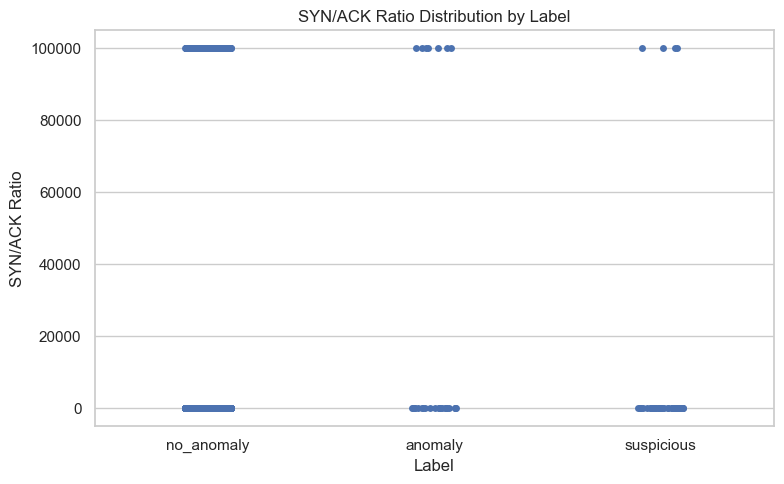

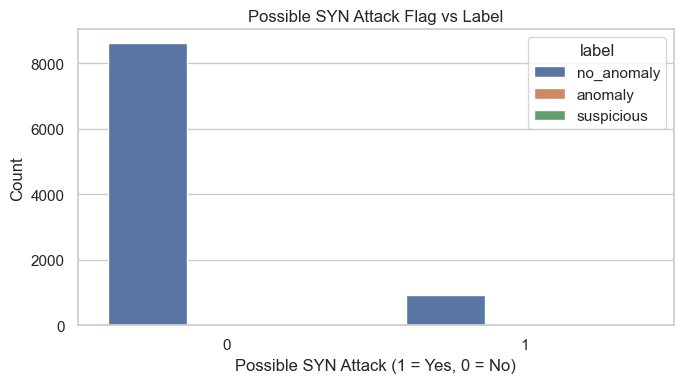


Average SYN/ACK ratio by class:
label
anomaly       24138.068964
no_anomaly     6571.524774
suspicious     8888.911111
Name: syn_ack_ratio, dtype: float64

Counts of 'possible_syn_attack' by class:
label
anomaly        10
no_anomaly    930
suspicious      4
Name: possible_syn_attack, dtype: int32


In [89]:
# This code block performs cybersecurity-focused feature engineering.
# The block engineers TCP flag–based features to highlight suspicious behaviors (like SYN floods), 
# visualizes their distribution by label, and summarizes stats to assess their value for threat detection.

# -----------------------------
# Feature Engineering
# -----------------------------

# -----------------------------
# Add Cyber-Specific Features (SYN/ACK/FIN flags)
# -----------------------------

# Avoid division by zero
epsilon = 1e-5

# 1. SYN/ACK ratio - indicates incomplete TCP handshakes (could signal SYN flood)
train_df['syn_ack_ratio'] = train_df['tcp_syn'] / (train_df['tcp_ack'] + epsilon)

# 2. SYN/FIN ratio - may suggest connections that never closed (possible scans or DoS)
train_df['syn_fin_ratio'] = train_df['tcp_syn'] / (train_df['tcp_fin'] + epsilon)

# 3. Total TCP flag sum - overall intensity of TCP control traffic
train_df['tcp_flag_sum'] = train_df['tcp_syn'] + train_df['tcp_ack'] + train_df['tcp_fin']

# 4. Binary flag: Is there a suspiciously high amount of SYNs compared to FINs?
train_df['possible_syn_attack'] = (train_df['tcp_syn'] > train_df['tcp_fin'] * 3).astype(int)

# Drop rows with infinities or NaNs if they occur (e.g. due to division)
train_df = train_df.replace([np.inf, -np.inf], np.nan).dropna()

# -----------------------------
# Visualize SYN/ACK ratio per label
# -----------------------------
plt.figure(figsize=(8, 5))
sns.stripplot(x='label', y='syn_ack_ratio', data=train_df, jitter=True)
plt.title("SYN/ACK Ratio Distribution by Label")
plt.ylabel('SYN/ACK Ratio')
plt.xlabel('Label')
plt.tight_layout()
plt.show()

# -----------------------------
# Visualize SYN vs FIN imbalance (Binary Feature)
# -----------------------------
plt.figure(figsize=(7, 4))
sns.countplot(x='possible_syn_attack', hue='label', data=train_df)
plt.title("Possible SYN Attack Flag vs Label")
plt.xlabel("Possible SYN Attack (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# -----------------------------
# Print some feature stats
# -----------------------------
print("\nAverage SYN/ACK ratio by class:")
print(train_df.groupby('label')['syn_ack_ratio'].mean())

print("\nCounts of 'possible_syn_attack' by class:")
print(train_df.groupby('label')['possible_syn_attack'].sum())




In [91]:
# In the feature engineering stage, we added several cybersecurity-focused features derived from TCP control flags (SYN, ACK, FIN). 
# These features aim to detect abnormal TCP behavior like SYN floods or incomplete connections.

# We calculated ratios such as SYN/ACK and SYN/FIN, total flag counts, and even a binary flag for potentially malicious behavior. 
# We visualized these metrics per class to analyze their effectiveness and detect patterns in anomalies or suspicious traffic.

In [94]:
# Prepares the final dataset for machine learning by removing irrelevant and target columns, 
# resulting in a clean feature set (X) and encoded labels (y) for model training.

# Define features and labels
X = train_df_encoded.drop(columns=['src_ip', 'dst_ip', 'label_encoded'])  # Remove non-useful features
y = train_df_encoded['label_encoded']

print("Final feature set:")
print(X.columns.tolist())


Final feature set:
['timestamp', 'ttl', 'packet_length', 'tcp_syn', 'tcp_ack', 'tcp_fin', 'protocol_ICMP', 'protocol_TCP', 'protocol_UDP']


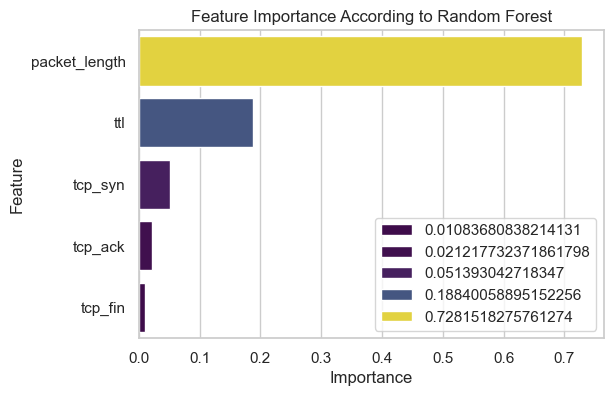

In [97]:
# This code visualizes how much each feature contributes to model decisions, 
# helping to identify which features are most informative and which might be redundant or irrelevant.

# Feature importance
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(6, 4))
sns.barplot(x=importances[indices], hue=importances[indices], y=np.array(features)[indices], palette='viridis')
plt.title("Feature Importance According to Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [101]:
from sklearn.metrics import f1_score

In [103]:
# This code optimizes a Random Forest classifier using GridSearchCV by testing various
# hyperparameters and selecting the combination that yields the highest macro F1 score using cross-validation.

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# Set up GridSearch with 5-fold CV and macro f1 scoring
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42, class_weight='balanced'),
    param_grid=param_grid,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=1
)

# Run the search
grid_search.fit(X, y)

# Save the best model
best_model = grid_search.best_estimator_

print("Best parameters found:")
print(grid_search.best_params_)

print("\nBest macro F1 score from cross-validation:")
print(grid_search.best_score_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters found:
{'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}

Best macro F1 score from cross-validation:
0.37789693909655964


In [104]:


# To improve the model's performance, we used GridSearchCV with 5-fold cross-validation to find the optimal parameters. 
# The chosen evaluation metric was macro F1, 
# since our problem involves three categories and we want to avoid favoring one category over the others.



In [105]:
# We trained a Random Forest classifier with cross-validation using GridSearchCV.

# Used macro-average F1 score as the selection metric — this accounts for class imbalance.

# Selected best hyperparameters (n_estimators, max_depth, min_samples_split).


## Part 5 - Apply on test and show model performance estimation

In [110]:
# This code preprocesses the test data consistently with training, predicts labels using the best model, 
# and shows both numeric and decoded predictions alongside true labels for evaluation.

# Apply the same OneHotEncoder to 'protocol'
encoded_protocol_test = encoder.transform(test_df[['protocol']])
encoded_protocol_test_df = pd.DataFrame(encoded_protocol_test, columns=encoder.get_feature_names_out(['protocol']))
encoded_protocol_test_df.index = test_df.index

# Merge encoded columns into test dataframe
test_df_encoded = pd.concat([test_df.drop(columns=['protocol']), encoded_protocol_test_df], axis=1)

# Encode the 'label' column using the existing label encoder
test_df_encoded['label_encoded'] = label_encoder.transform(test_df_encoded['label'])

# Normalize numeric features using the same scaler
test_df_encoded[numeric_cols] = scaler.transform(test_df_encoded[numeric_cols])

# Final test features
X_test = test_df_encoded.drop(columns=['src_ip', 'dst_ip', 'label', 'label_encoded'])
y_test = test_df_encoded['label_encoded']

# Predict on test set
y_pred_test = best_model.predict(X_test)

# Show first 5 predictions
print("First 5 predictions (encoded):", y_pred_test[:5])
print("Corresponding true labels:", y_test.values[:5])

# Decode predictions to original class names
decoded_preds = label_encoder.inverse_transform(y_pred_test)
decoded_true = label_encoder.inverse_transform(y_test)


First 5 predictions (encoded): [1 1 1 1 1]
Corresponding true labels: [1 1 1 1 1]


In [113]:
# We applied all the preprocessing steps to the test set exactly as we did for the training set, ensuring consistency. 
# Then we used the trained model with the optimal parameters selected via GridSearchCV. 

In [116]:
# Conclusion – General Summary of the Project

# We chose a classification problem in the cybersecurity domain – classifying network packets as suspicious or anomalous.

# We built a complete machine learning pipeline that includes: data loading, EDA, feature engineering, model building, fine-tuning, and evaluation.

# We used a Random Forest model with label encoding, and managed the entire workflow according to the project requirements.